# Explore here

In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [116]:
data = pd.read_csv('/Users/SamuelHollis/Desktop/4GeeksAcademy/20a clase-Arbol_de_Decisión/Arbol_de_Decision_Project/data/raw/data')

In [117]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [119]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


check duplicados

In [121]:
df.duplicated().sum()

0

chech nulos

In [122]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

check outliers

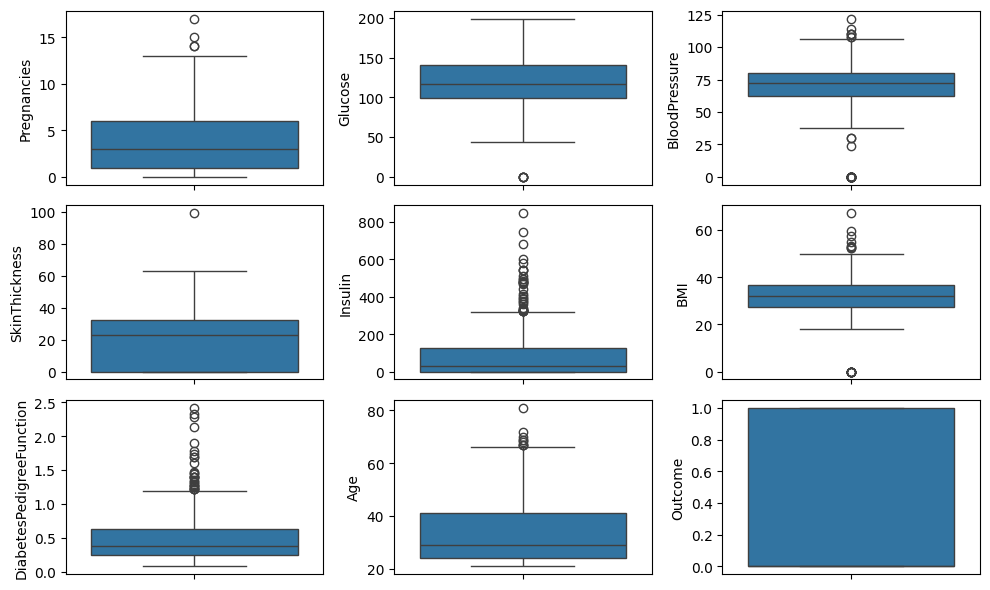

In [123]:
fig, axis = plt.subplots(3, 3, figsize= (10, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = 'Pregnancies')
sns.boxplot(ax = axis[0, 1], data = df, y = 'Glucose')
sns.boxplot(ax = axis[0, 2], data = df, y = 'BloodPressure')
sns.boxplot(ax = axis[1, 0], data = df, y = 'SkinThickness')
sns.boxplot(ax = axis[1, 1], data = df, y = 'Insulin')
sns.boxplot(ax = axis[1, 2], data = df, y = 'BMI')
sns.boxplot(ax = axis[2, 0], data = df, y = 'DiabetesPedigreeFunction')
sns.boxplot(ax = axis[2, 1], data = df, y = 'Age')
sns.boxplot(ax = axis[2, 2], data = df, y = 'Outcome')

plt.tight_layout()
plt.show()



Vemos que en *Glucose*, *Bloodpressure*, *Insulin* y *BMI* hay outliers que pueden ser preocupantes; Comprobamos si es asi y eliminamos is hace falta y no daña el ds

**Glucose**

In [124]:
print((df['Glucose'] == 0).sum())

5


**BloodPressure**

In [125]:
print((df['BloodPressure'] == 0).sum())

35


No elimino los registros porque considero que son demasiados

**Insulin**

In [126]:
print((df['Insulin'] >= 600).sum())

4


**BMI**

In [127]:
print((df['BMI'] == 0).sum())

11


Elimino el resto

In [128]:
#df = df[df['Glucose'] != 0]
#df = df[df['Insulin'] < 600]
#df = df[df['BMI'] != 0]

In [129]:
df.shape

(768, 9)

In [130]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [131]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [132]:
y.unique()

array([1, 0])

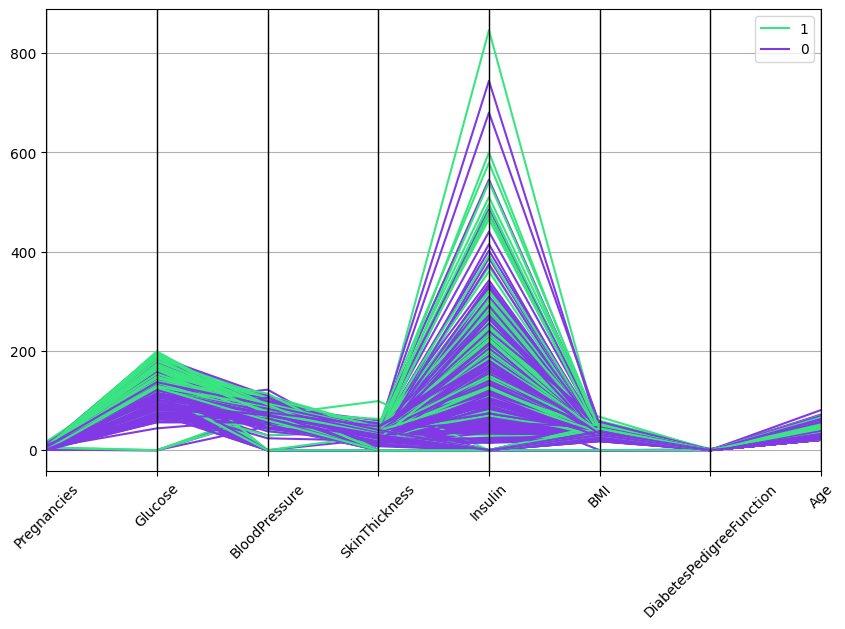

In [133]:
total_data = X
total_data["Outcome"] = y

plt.figure(figsize=(10, 6))
parallel_coordinates_plot = pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#39E581", "#8139E5"))

# Rotar las etiquetas del eje Y
_ = plt.xticks(rotation=45)

## Modelamos

In [134]:
model = DecisionTreeClassifier(random_state= 42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [136]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [141]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [142]:
# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [143]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy}")

Mejores parámetros: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5}
Precisión en el conjunto de prueba: 0.7337662337662337


In [144]:
# Crear un DataFrame con los resultados de la búsqueda en cuadrícula
results = pd.DataFrame(grid_search.cv_results_)
print(results)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.024919      0.007260         0.016295        0.011368   
1         0.041888      0.030936         0.026527        0.013584   
2         0.045139      0.021061         0.018889        0.015132   
3         0.031950      0.018355         0.012996        0.004908   
4         0.030563      0.012327         0.013815        0.006892   
..             ...           ...              ...             ...   
427       0.015783      0.007537         0.021174        0.010271   
428       0.019056      0.011503         0.007843        0.001824   
429       0.014343      0.009523         0.013702        0.009066   
430       0.011093      0.001782         0.015538        0.006161   
431       0.011024      0.000933         0.007225        0.002085   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0              gini            None               None                      1   
1        

In [145]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7467532467532467
F1 score Test:  0.7467532467532467
Precision Test:  0.7467532467532467
Recall Test:  0.7467532467532467
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0
